In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis


In [2]:
root = '/media/meixin/transfollower/data'
split = 'train_SH'

data = np.load(os.path.join(root, split + '.npy'), allow_pickle = True)

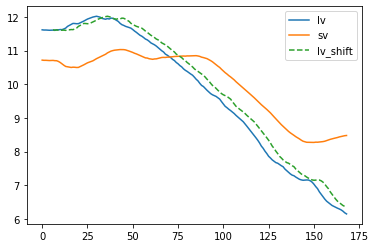

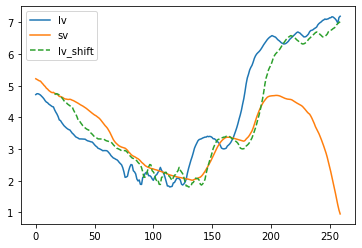

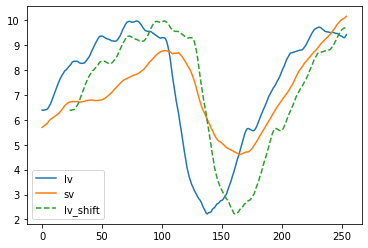

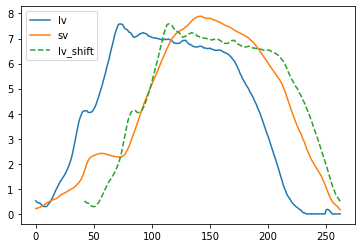

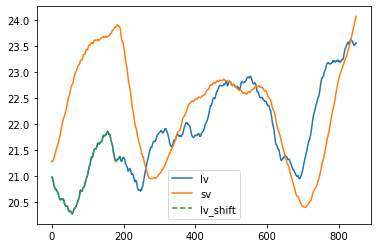

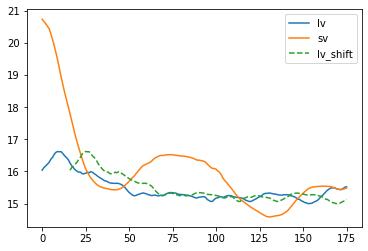

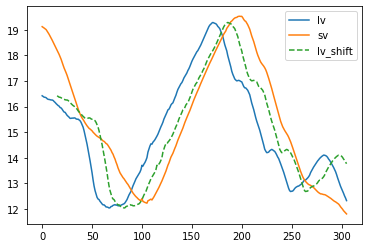

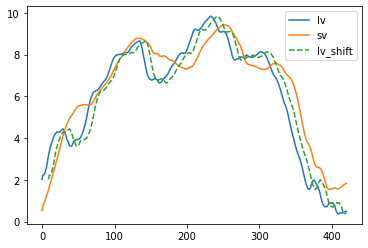

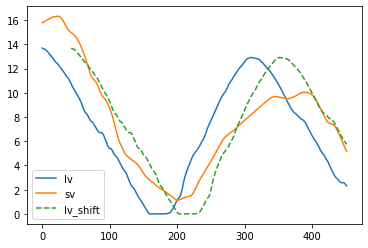

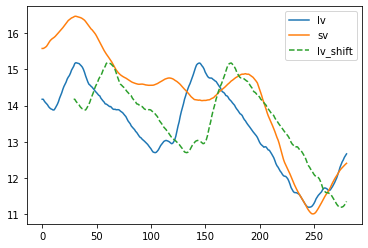

In [35]:
for i in range(10):
    event = data[i]
    space, svSpd, relSpd, lvSpd = event.T

    path = np.array(dtw.warping_path(svSpd, lvSpd))
    RT = int(np.mean(path[:,0] - path[:,1]))

    # warp_idx = [item[-1] for item in path]
    # lvSpd_warp = lvSpd[warp_idx]
    lvSpd_shift = np.append([np.nan]*RT, lvSpd[:-RT])

    plt.plot(lvSpd, label = 'lv')
    plt.plot(svSpd, label = 'sv')
    plt.plot(lvSpd_shift, '--', label = 'lv_shift')
    plt.legend()
    plt.show()

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



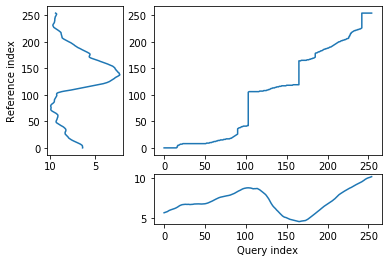

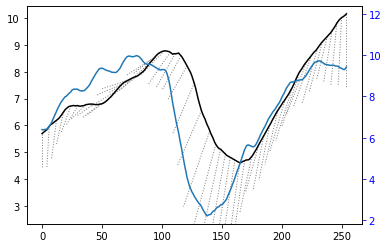

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



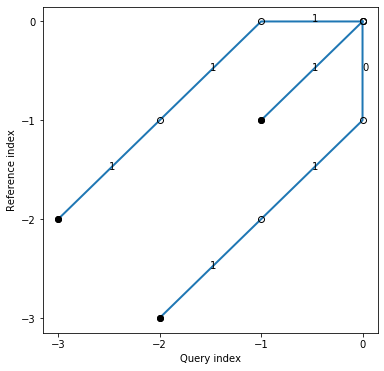

In [5]:
from dtw import *

query = svSpd
template = lvSpd

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()